# **Assignment Week 10 - Geospatial Visualization - Data Visualization**

Name : Muhammad Rieza Fachrezi

NIM  : 1301204335

Class: IF-44-PIL-DS01

Dataset : COVID-19 Indonesia Dataset (https://www.kaggle.com/datasets/hendratno/covid19-indonesia)

## Visualization

### Import libraries

In [1]:
!pip install shapely==1.8.0
!pip install geoplot

import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
from google.colab import drive

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.2
    Uninstalling shapely-2.0.2:
      Successfully uninstalled shapely-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 41.3 MB/s eta 0:00:00


### Mount Google Drive containing the .shp file

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


### Import the dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/riezaf51/geospatial-visualization-assignment/main/covid_19_indonesia_time_series_all.csv')
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,203,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,654,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


### Data Pre-processing

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df_covid = df[[
    'Date',
    'Province',
    'New Cases',
    'New Deaths',
    'New Recovered',
    'New Active Cases',
    'Total Cases',
    'Total Deaths',
    'Total Recovered',
    'Total Active Cases'
]].copy()

df_covid['Province'] = df_covid['Province'].str.upper()

df_covid.head(5)

,Date,Province,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,2020-03-01,DKI JAKARTA,2,0,0,2,39,20,75,-56
1,2020-03-02,DKI JAKARTA,2,0,0,2,41,20,75,-54
2,2020-03-02,NaN,2,0,0,2,2,0,0,2
3,2020-03-02,RIAU,1,0,0,1,1,0,1,0
4,2020-03-03,DKI JAKARTA,2,0,0,2,43,20,75,-52


### Import the .shp file

In [6]:
map_indonesia = gpd.read_file('/content/drive/MyDrive/datasets/BATAS PROVINSI DESEMBER 2019 DUKCAPIL/BATAS_PROVINSI_DESEMBER_2019_DUKCAPIL.shp')
map_indonesia

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,geometry
0,1,ACEH,27.455786,4.625436,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97..."
1,2,BALI,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ..."
2,3,BANTEN,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ..."
3,4,BENGKULU,11.706367,1.630129,"MULTIPOLYGON Z (((102.38616 -5.47144 0.00003, ..."
4,5,DAERAH ISTIMEWA YOGYAKARTA,3.342892,0.260130,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ..."
5,6,DKI JAKARTA,3.123689,0.053426,"MULTIPOLYGON Z (((106.87677 -6.10030 0.00003, ..."
6,7,GORONTALO,11.013237,0.977600,"MULTIPOLYGON Z (((121.42536 0.41243 0.00003, 1..."
7,8,JAMBI,11.835072,3.977711,"MULTIPOLYGON Z (((104.40714 -0.86371 0.00003, ..."
8,9,JAWA BARAT,11.614950,3.032785,"MULTIPOLYGON Z (((108.68501 -6.76990 0.00003, ..."
9,10,JAWA TENGAH,15.456349,2.819838,"MULTIPOLYGON Z (((108.88353 -7.74846 0.00003, ..."


### Geoplot polyplot of Indonesian map

/usr/local/lib/python3.10/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: >

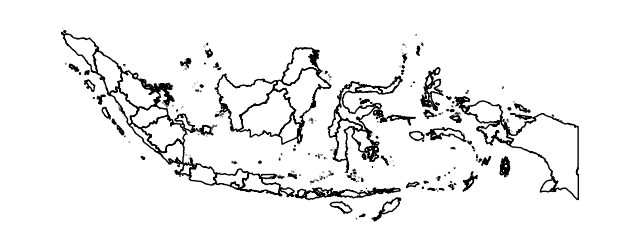

In [7]:
gplt.polyplot(map_indonesia)

### Visualization of COVID-19 cumulative cases per province

In [8]:
df_1_jun_2021 = df_covid[df_covid['Date'] <= '2021-06-01']
df_1_jun_2021.sort_values('Total Cases', ascending=False, inplace=True)

<ipython-input-8-45b68c41b19b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_jun_2021.sort_values('Total Cases', ascending=False, inplace=True)


In [9]:
province_df = df_1_jun_2021.groupby('Province').first().reset_index()
province_df

,Province,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,ACEH,2021-06-01,122,1,117,4,15139,596,11911,2632
1,BALI,2021-06-01,28,0,32,-4,47287,1504,45179,604
2,BANTEN,2021-06-01,119,1,30,88,49595,1258,46891,1446
3,BENGKULU,2021-06-01,40,0,48,-8,8114,180,7188,746
4,DAERAH ISTIMEWA YOGYAKARTA,2021-06-01,219,9,178,32,44965,1192,41620,2153
5,DKI JAKARTA,2021-06-01,519,11,509,-1,430573,7189,412619,10765
6,GORONTALO,2021-05-31,4,0,4,0,5505,172,5239,94
7,JAMBI,2021-06-01,66,1,66,-1,9678,184,7887,1607
8,JAWA BARAT,2021-06-01,950,12,2097,-1159,316355,4241,282411,29703
9,JAWA TENGAH,2021-06-01,866,23,121,722,201849,9414,180424,12011


In [10]:
geo_df_covid = map_indonesia.merge(province_df, left_on='PROVINSI', right_on='Province')
geo_df_covid

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,geometry,Province,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,1,ACEH,27.455786,4.625436,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97...",ACEH,2021-06-01,122,1,117,4,15139,596,11911,2632
1,2,BALI,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ...",BALI,2021-06-01,28,0,32,-4,47287,1504,45179,604
2,3,BANTEN,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ...",BANTEN,2021-06-01,119,1,30,88,49595,1258,46891,1446
3,4,BENGKULU,11.706367,1.630129,"MULTIPOLYGON Z (((102.38616 -5.47144 0.00003, ...",BENGKULU,2021-06-01,40,0,48,-8,8114,180,7188,746
4,5,DAERAH ISTIMEWA YOGYAKARTA,3.342892,0.260130,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ...",DAERAH ISTIMEWA YOGYAKARTA,2021-06-01,219,9,178,32,44965,1192,41620,2153
5,6,DKI JAKARTA,3.123689,0.053426,"MULTIPOLYGON Z (((106.87677 -6.10030 0.00003, ...",DKI JAKARTA,2021-06-01,519,11,509,-1,430573,7189,412619,10765
6,7,GORONTALO,11.013237,0.977600,"MULTIPOLYGON Z (((121.42536 0.41243 0.00003, 1...",GORONTALO,2021-05-31,4,0,4,0,5505,172,5239,94
7,8,JAMBI,11.835072,3.977711,"MULTIPOLYGON Z (((104.40714 -0.86371 0.00003, ...",JAMBI,2021-06-01,66,1,66,-1,9678,184,7887,1607
8,9,JAWA BARAT,11.614950,3.032785,"MULTIPOLYGON Z (((108.68501 -6.76990 0.00003, ...",JAWA BARAT,2021-06-01,950,12,2097,-1159,316355,4241,282411,29703
9,10,JAWA TENGAH,15.456349,2.819838,"MULTIPOLYGON Z (((108.88353 -7.74846 0.00003, ...",JAWA TENGAH,2021-06-01,866,23,121,722,201849,9414,180424,12011


Text(0.5, 1.0, 'Peta Sebaran Akumulasi Kasus Positif COVID-19 di Indonesia Tanggal 1 Juni 2021 per Provinsi')

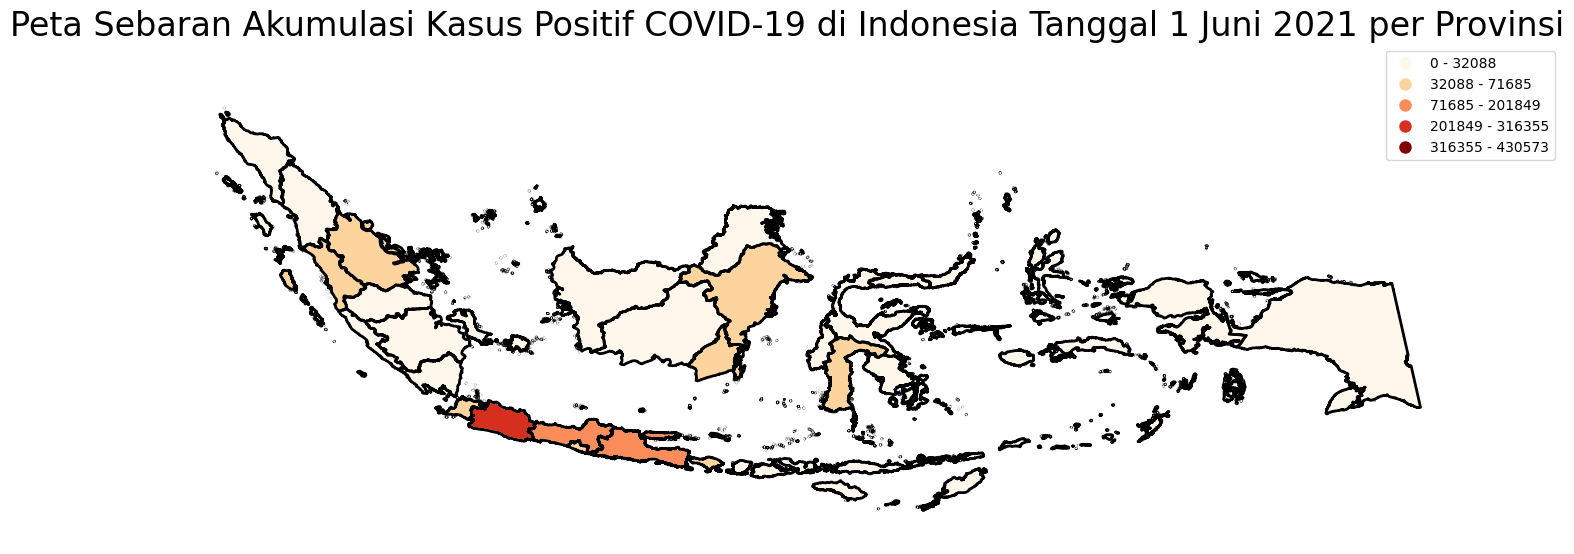

In [11]:
ax = gplt.choropleth(
    geo_df_covid,
    hue="Total Cases",
    edgecolor="white",
    linewidth=2,
    legend=True,
    cmap="OrRd",
    scheme="FisherJenks",
    alpha = 1,
    projection=gcrs.AlbersEqualArea(),
    figsize=(20, 20)
)

gplt.polyplot(
    map_indonesia,
    ax=ax,
    edgecolor="black",
    linewidth=2,
    zorder=2
)

ax.set_title(
    "Peta Sebaran Akumulasi Kasus Positif COVID-19 di Indonesia Tanggal 1 Juni 2021 per Provinsi",
    fontsize=24
)


### Visualization of COVID-19 daily cases per province

Text(0.5, 1.0, 'Peta Sebaran Kasus Positif Harian COVID-19 di Indonesia Tanggal 1 Juni 2021 per Provinsi')

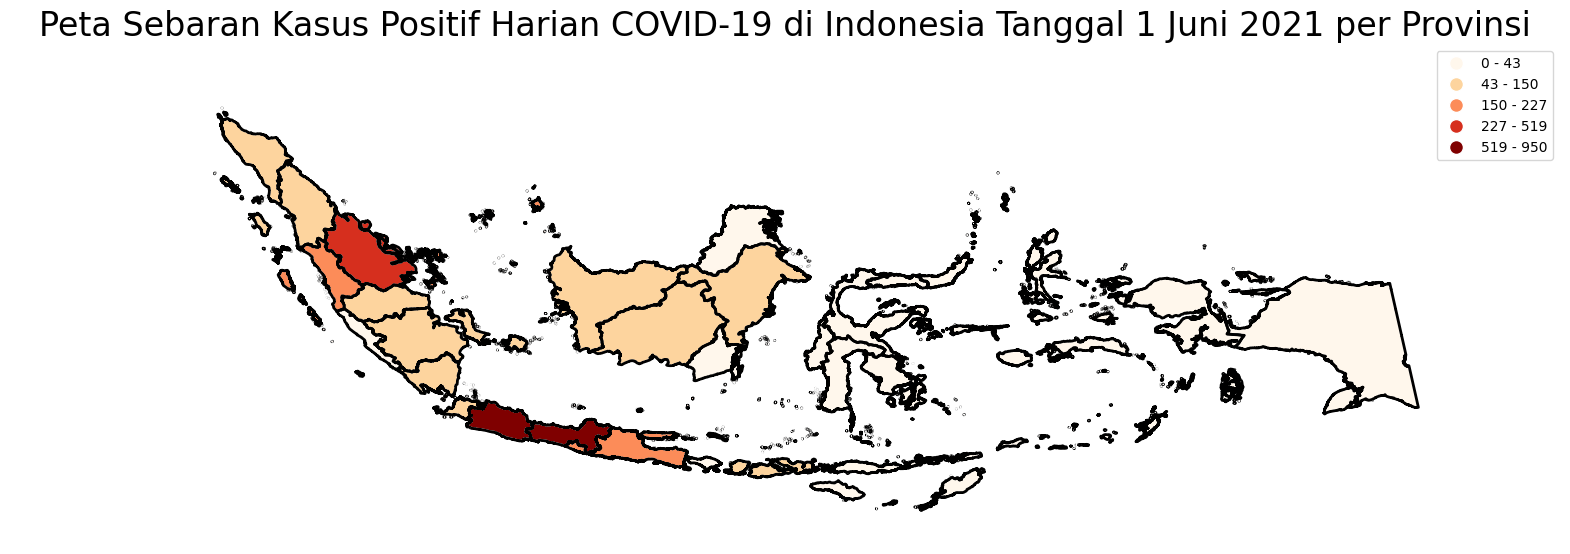

In [12]:
df_1_jun_2021_daily = df_covid[df_covid['Date'] == '2021-06-01']

geo_df_covid_daily = map_indonesia.merge(province_df, left_on='PROVINSI', right_on='Province')

ax = gplt.choropleth(
    geo_df_covid,
    hue="New Cases",
    edgecolor="white",
    linewidth=2,
    legend=True,
    cmap="OrRd",
    scheme="FisherJenks",
    alpha = 1,
    projection=gcrs.AlbersEqualArea(),
    figsize=(20, 20)
)

gplt.polyplot(
    map_indonesia,
    ax=ax,
    edgecolor="black",
    linewidth=2,
    zorder=2
)

ax.set_title(
    "Peta Sebaran Kasus Positif Harian COVID-19 di Indonesia Tanggal 1 Juni 2021 per Provinsi",
    fontsize=24
)


### Visualization of COVID-19 daily deaths per province

Text(0.5, 1.0, 'Peta Sebaran Kematian Harian COVID-19 di Indonesia Tanggal 1 Juni 2021 per Provinsi')

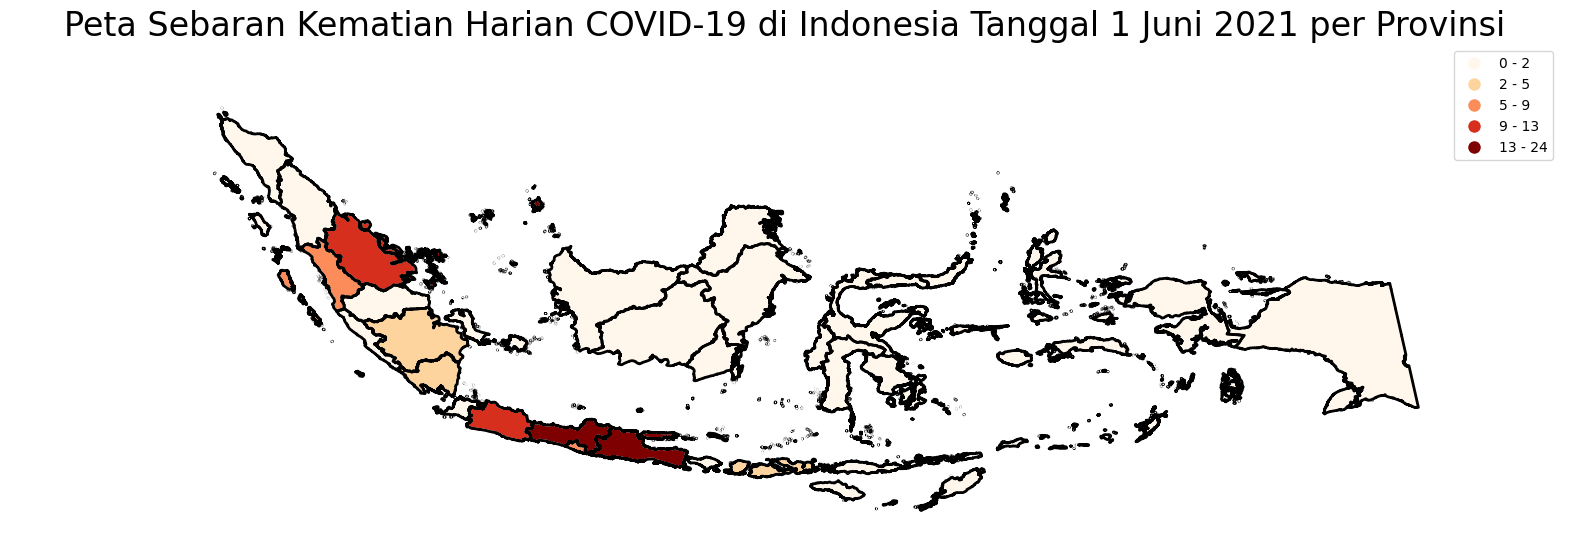

In [13]:
ax = gplt.choropleth(
    geo_df_covid,
    hue="New Deaths",
    edgecolor="white",
    linewidth=2,
    legend=True,
    cmap="OrRd",
    scheme="FisherJenks",
    alpha = 1,
    projection=gcrs.AlbersEqualArea(),
    figsize=(20, 20)
)

gplt.polyplot(
    map_indonesia,
    ax=ax,
    edgecolor="black",
    linewidth=2,
    zorder=2
)

ax.set_title(
    "Peta Sebaran Kematian Harian COVID-19 di Indonesia Tanggal 1 Juni 2021 per Provinsi",
    fontsize=24
)